In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [216]:
path = '/content/electricity_consumption_and_production.csv'
df = pd.read_csv(path, parse_dates=['DateTime'], index_col='DateTime')
df

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...
2025-03-19 19:00:00,8027,6177,1367,593,1922,1217,978,0,71
2025-03-19 20:00:00,7939,6228,1376,647,1920,1223,965,0,71
2025-03-19 21:00:00,7553,6120,1376,671,1881,1171,949,0,69


In [217]:
print(df.isnull().sum())
print(df.isna().sum())

Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64


In [218]:
df.duplicated().value_counts()

,count
False,53711
True,450


In [219]:
df = df[~df.duplicated(keep='first')]
df.duplicated().value_counts()

,count
False,53711


In [220]:
daily_df = df.resample('D').mean()
week_df = df.resample('W').mean()
monthly_df = df.resample('ME').mean()

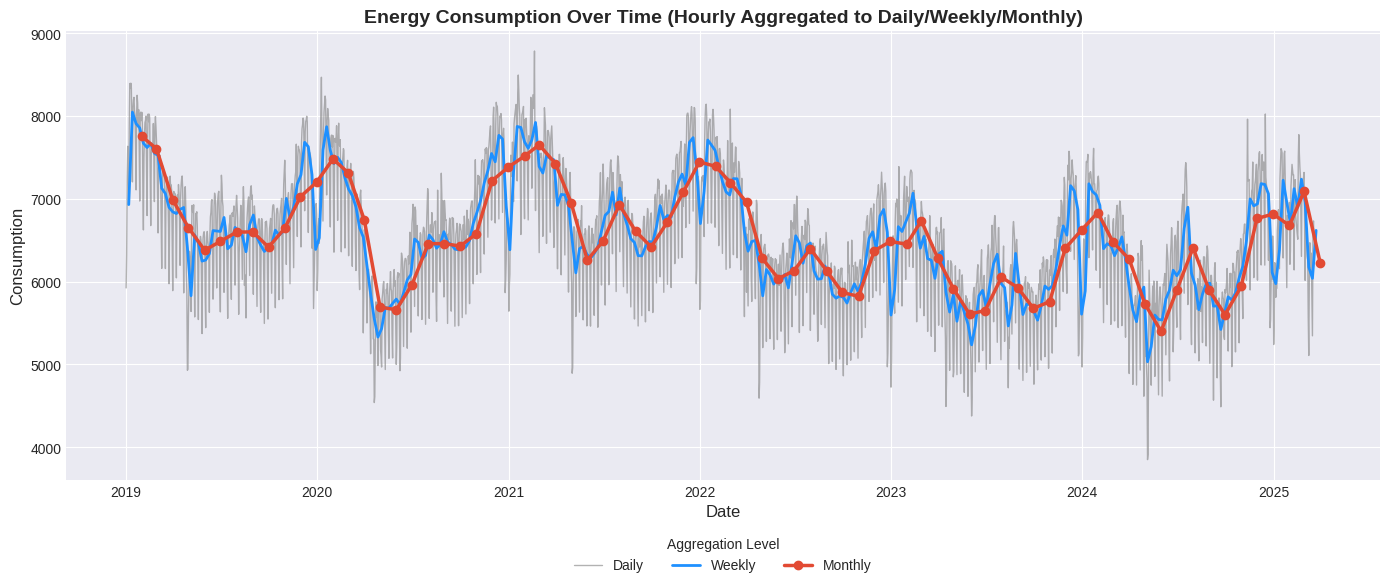

In [234]:
fig, ax = plt.subplots(figsize=(14, 6))

# Денне
ax.plot(daily_df.index,
        daily_df['Consumption'].values,
        alpha=0.6,
        linewidth=1,
        color='gray',
        label='Daily')

# Тижневе
ax.plot(week_df.index,
        week_df['Consumption'].values,
        linewidth=2,
        color='dodgerblue',
        label='Weekly')

# Місячне
ax.plot(monthly_df.index,
        monthly_df['Consumption'].values,
        linewidth=2.5,
        marker='o',
        label='Monthly')
# загальний плот
ax.set_title('Energy Consumption Over Time (Hourly Aggregated to Daily/Weekly/Monthly)',
             fontsize=14, fontweight='bold')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Consumption', fontsize=12)

ax.legend(title='Aggregation Level', fontsize=10, bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=3,)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [222]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [229]:
print(daily_df.isnull().sum())
daily_df[daily_df.isnull().any(axis=1)]

Consumption      2
Production       2
Nuclear          2
Wind             2
Hydroelectric    2
Oil and Gas      2
Coal             2
Solar            2
Biomass          2
dtype: int64


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2025-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
daily_df.dropna(how='all', inplace=True)
print(daily_df.isnull().sum())
print(daily_df[daily_df.isnull().any(axis=1)])

Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64
Empty DataFrame
Columns: [Consumption, Production, Nuclear, Wind, Hydroelectric, Oil and Gas, Coal, Solar, Biomass]
Index: []


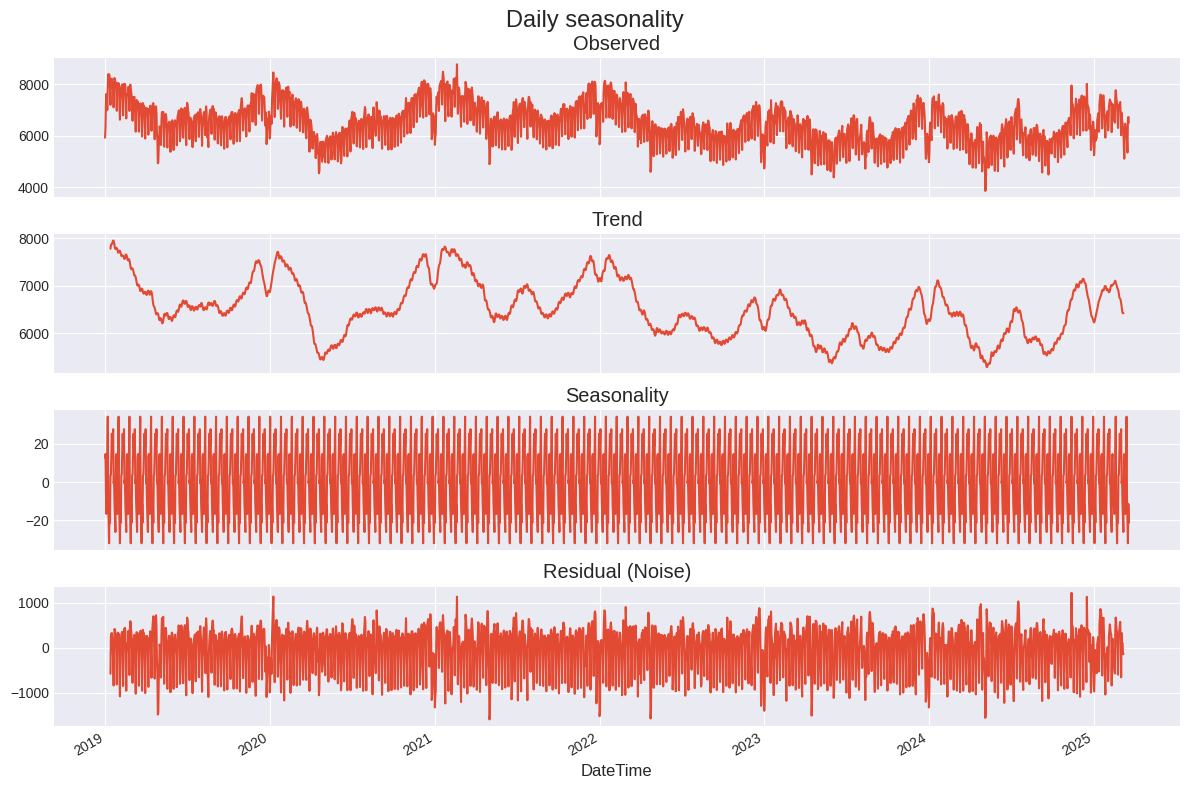

In [241]:
daily_decomposition = seasonal_decompose(daily_df['Consumption'], model='additive', period=24)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
daily_decomposition.observed.plot(ax=axes[0], title='Observed')
daily_decomposition.trend.plot(ax=axes[1], title='Trend')
daily_decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
daily_decomposition.resid.plot(ax=axes[3], title='Residual (Noise)')
plt.tight_layout()
plt.suptitle('Daily seasonality', fontsize=17)
plt.subplots_adjust(top=0.92)
plt.show()

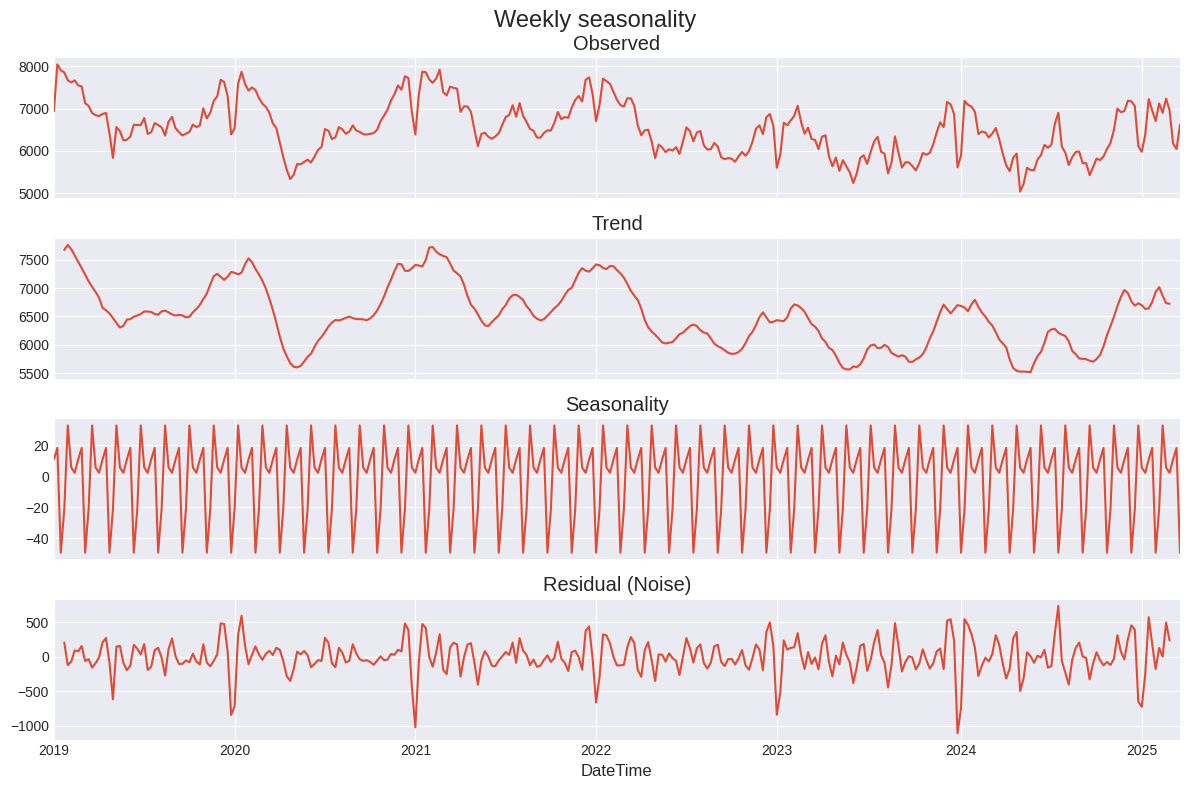

In [244]:
week_decomposition = seasonal_decompose(week_df['Consumption'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
week_decomposition.observed.plot(ax=axes[0], title='Observed')
week_decomposition.trend.plot(ax=axes[1], title='Trend')
week_decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
week_decomposition.resid.plot(ax=axes[3], title='Residual (Noise)')
plt.tight_layout()
plt.suptitle('Weekly seasonality', fontsize=17)
plt.subplots_adjust(top=0.92)
plt.show()

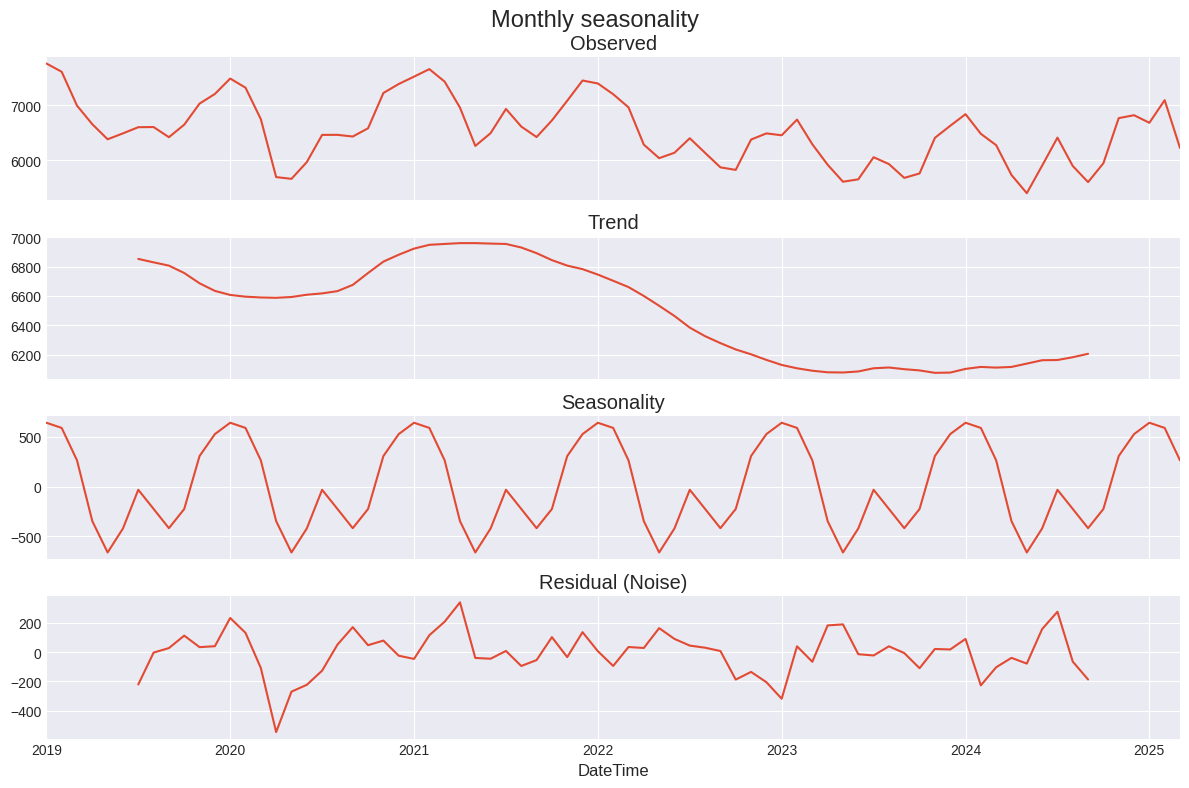

In [247]:
monthly_decomposition = seasonal_decompose(monthly_df['Consumption'], model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
monthly_decomposition.observed.plot(ax=axes[0], title='Observed')
monthly_decomposition.trend.plot(ax=axes[1], title='Trend')
monthly_decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
monthly_decomposition.resid.plot(ax=axes[3], title='Residual (Noise)')
plt.tight_layout()
plt.suptitle('Monthly seasonality', fontsize=17)
plt.subplots_adjust(top=0.92)
plt.show()

| Питання                                       |  Відповідь           |
| --------------------------------------------- | ----------------------------- |
| Чи є сезонність?                              | `Seasonality` subplot         |
| Який тренд у споживанні?                      | `Trend` subplot               |
| Чи добре модель пояснює ряд?                  | `Residual` (якщо шум — добре) |
| Чи правильна сезонність (`period`)?           | `Seasonality`, `Residual`     |
| Чи є викиди, аномалії або структурні залишки? | `Residual`, `Observed`        |


In [248]:
from statsmodels.tsa.stattools import adfuller

In [249]:
def adf_stationarity_test(time_series: pd.Series):
    """Checks if time series is stationary based on ADF test"""

    adf_result = adfuller(time_series)
    p_value = adf_result[1]
    print(f"p_value: {p_value}")

    if p_value < 0.05:
        return True # Reject the null hypothesis: The time series is stationary.

    return False # Fail to reject the null hypothesis: The time series is non-stationary.

In [250]:
daily_stat = adf_stationarity_test(daily_df['Consumption'])
weekly_stat = adf_stationarity_test(week_df['Consumption'])
monthly_stat = adf_stationarity_test(monthly_df['Consumption'])

daily_stat, weekly_stat, monthly_stat

p_value: 0.010367162820465283
p_value: 0.002947065979790028
p_value: 0.7482533784265863


(True, True, False)

## **3 Build a Predictive Model**

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [252]:
def calculate_metrics(test_series: pd.Series, forecast_series: pd.Series):
    """
    Calculate metrics for the forecasted values

    Args:
        test_series (pd.Series): Time Series for evaluation
        forecasted_series (pd.Series): Forecasted values

    Returns:
        - mape: Mean Absolute Percentage Error between test vs forecast
        - mae: Mean Absolute Error between test vs forecast
        - mse: Mean Squared Error between test vs forecast
    """

    mape = mean_absolute_percentage_error(test_series, forecast_series)
    mae = mean_absolute_error(test_series, forecast_series)
    mse = mean_squared_error(test_series, forecast_series)

    return mape, mae, mse


def visualize_forecast(
    train_series: pd.Series,
    test_series: pd.Series,
    forecast_series: pd.Series,
    title: str="Forecasting predictions"
):
    """
    Visualize forecasting predictions with metrics

    Args:
        train_series (pd.Series): Historircal time series
        test_series (pd.Series): Time Series for evaluation
        forecasted_series (pd.Series): Forecasted values
        title (str): Plot title
    """

    # Calculate metrics
    mape, mae, mse = calculate_metrics(test_series, forecast_series)

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot each series
    train_series.plot(ax=ax, label="Train series")
    test_series.plot(ax=ax, label="Test Series")
    forecast_series.plot(ax=ax, label="Predicted Series")

    # Plotting titles and labels
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Forecast results")
    ax.grid(True)
    ax.legend(title="Series")

    # Add the metrics as text on the plot
    metrics_text = f"MAPE: {mape:.2f}%\nMAE: {mae:.2f}\nMSE: {mse:.2f}"
    ax.text(0.99, 0.95, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

    plt.tight_layout()
    plt.show()

In [274]:
horizon_days = 15
train = daily_df['Consumption'].iloc[:-horizon_days]
test = daily_df['Consumption'].iloc[-horizon_days:]

train.shape, test.shape

((2253,), (15,))

In [287]:
train.tail(), test.tail(15)

(DateTime
 2025-02-28    7319.590909
 2025-03-01    6747.166667
 2025-03-02    6016.166667
 2025-03-03    6901.217391
 2025-03-04    6584.250000
 Name: Consumption, dtype: float64,
 DateTime
 2025-03-05    6530.478261
 2025-03-06    6308.250000
 2025-03-07    6258.125000
 2025-03-08    5563.043478
 2025-03-09    5108.833333
 2025-03-10    5990.400000
 2025-03-11    6469.952381
 2025-03-12    6169.045455
 2025-03-13    6347.875000
 2025-03-14    6222.894737
 2025-03-15    5817.956522
 2025-03-16    5346.375000
 2025-03-17    6603.125000
 2025-03-18    6733.250000
 2025-03-19    6512.772727
 Name: Consumption, dtype: float64,
 dtype('float64'))

In [275]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from mango import scheduler, Tuner

In [294]:
@scheduler.parallel(n_jobs=2)
def sarima_objective(**params):
    """Objective function to find best set of SARIMAX parameters"""

    p, d, q, P, D, Q, s = int(params['p']), int(params['d']), int(params['q']), \
                        int(params['P']), int(params['D']), int(params['Q']), int(params['s'])

    try:
        model = SARIMAX(train[-100:],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        aic = results.aic # Minimize AIC to find the best model
    except:
        aic = np.inf

    return aic

In [295]:
# Define the search space
sarimax_param_space = {
    'p': range(0, 3),
    'd': [1], # Use only first-order differencing
    'q': range(0, 3),
    'P': range(0, 3),
    'D': [1], # Use only first-order differencing
    'Q': range(0, 3),
    's': [12]  # Assume yearly seasonality
}

In [296]:
tuner = Tuner(sarimax_param_space, objective=sarima_objective, conf_dict={"num_iteration": 10})
tuning_results = tuner.minimize()
best_params = tuning_results["best_params"]
best_params

  0%|          | 0/10 [00:00<?, ?it/s]

{'D': 1, 'P': 2, 'Q': 0, 'd': 1, 'p': 2, 'q': 2, 's': 12}

In [297]:
order = (
    best_params["p"],
    best_params["d"],
    best_params["q"],
)

seasonal_order = (
    best_params["P"],
    best_params["D"],
    best_params["Q"],
    best_params["s"],
)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

In [298]:
forecast_series = results.forecast(steps=len(test))
forecast_series

,predicted_mean
2253,6450.887178
2254,6850.812036
2255,6359.127525
2256,6950.695409
2257,6957.823511
2258,6944.597122
2259,6583.591956
2260,6674.687475
2261,7084.153437
2262,7010.047478


In [299]:
# Визначити індекс починаючи з наступного дня після останнього дня train
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=15, freq='D')

# Присвоїти його прогнозу
forecast_series.index = forecast_index


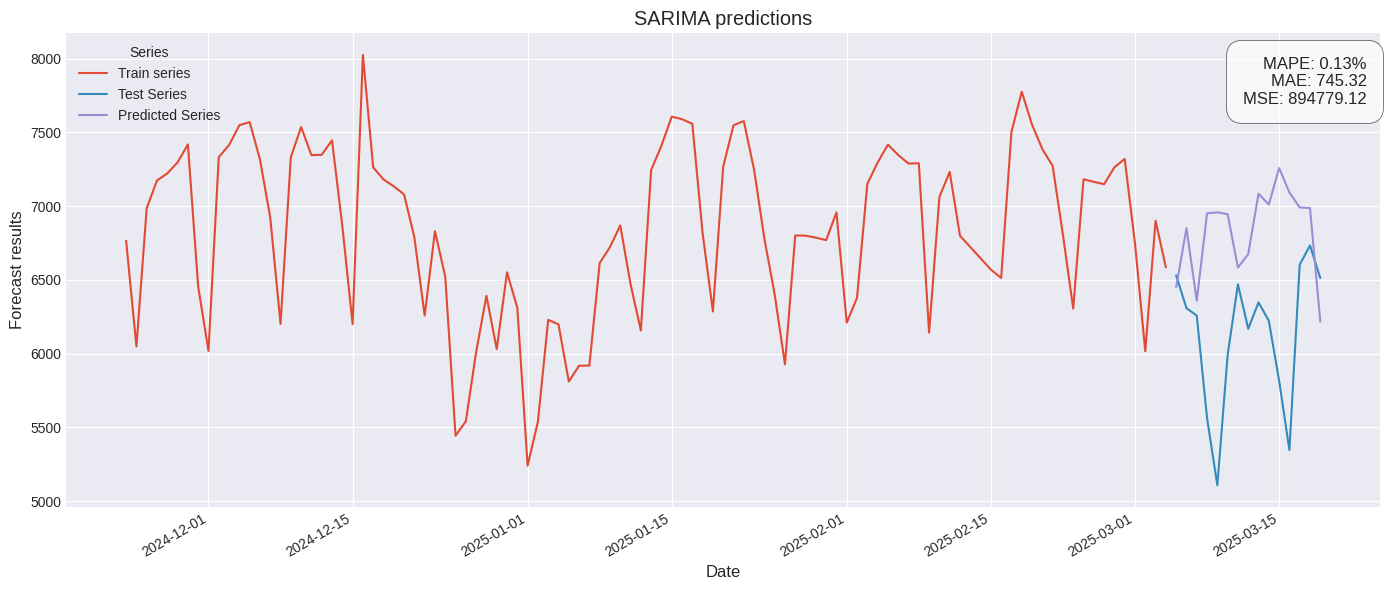

In [302]:
visualize_forecast(
    train[-100:],
    test,
    forecast_series,
    title="SARIMA predictions"
)

In [292]:
differenced_daily_df = daily_df['Consumption'].diff().dropna()
differenced_daily_df

,Consumption
DateTime,
2019-01-02,397.563406
2019-01-03,932.041667
2019-01-04,381.000000
2019-01-05,-211.561594
2019-01-06,-417.646739
...,...
2025-03-15,-404.938215
2025-03-16,-471.581522
2025-03-17,1256.750000


In [ ]:
def run_daily_with_diff():


# детекція кращих параметрів
  @scheduler.parallel(n_jobs=2)
  def sarima_objective(**params):
      """Objective function to find best set of SARIMAX parameters"""

      p, d, q, P, D, Q, s = int(params['p']), int(params['d']), int(params['q']), \
                          int(params['P']), int(params['D']), int(params['Q']), int(params['s'])

      try:
          model = SARIMAX(train[-100:],
                          order=(p, d, q),
                          seasonal_order=(P, D, Q, s),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
          results = model.fit(disp=False)
          aic = results.aic # Minimize AIC to find the best model
      except:
          aic = np.inf

      return aic

# Define the search space
sarimax_param_space = {
    'p': range(0, 3),
    'd': [1], # Use only first-order differencing
    'q': range(0, 3),
    'P': range(0, 3),
    'D': [1], # Use only first-order differencing
    'Q': range(0, 3),
    's': [12]  # Assume yearly seasonality
    }

# тюнінг
tuner = Tuner(sarimax_param_space, objective=sarima_objective, conf_dict={"num_iteration": 10})
tuning_results = tuner.minimize()
best_params = tuning_results["best_params"]
best_params

order = (
  best_params["p"],
  best_params["d"],
  best_params["q"],
)

seasonal_order = (
  best_params["P"],
  best_params["D"],
  best_params["Q"],
  best_params["s"],
)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)